In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

import glob
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from models import CNN
from dataset import cats_dogs_dataset

In [2]:
model = CNN()
PATH = './dogs_cats_binary.pth'
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [3]:
#model

In [5]:
test_loc = './data/test1/'
test_set = glob.glob(test_loc + '*.jpg')[:10]

transform = transforms.Compose(
        [
            transforms.Resize((256, 256)),
            #transforms.RandomCrop((299, 299)),
            transforms.ToTensor(),
            transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
        ]
    )

In [6]:
len(test_set)

10

In [7]:
test_loader = torch.Tensor(len(test_set), 3, 256, 256)

for num, img in enumerate(test_set):
    image_id = img.split('/')[-1]
    img = Image.open(os.path.join(test_loc, image_id)).convert('RGB')
    img = transform(img)
    test_loader[num, :, :, :] = img

In [8]:
outputs = model(test_loader)

In [ ]:
#outputs

DOG


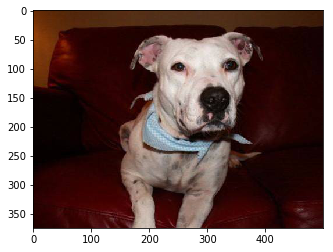

CAT


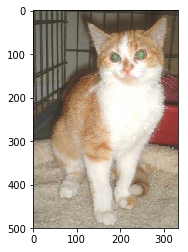

CAT


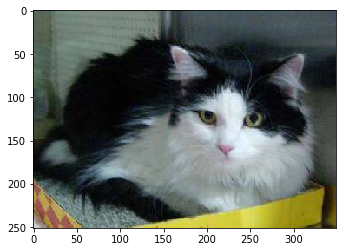

DOG


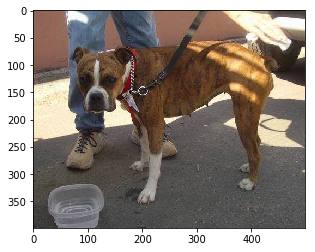

DOG


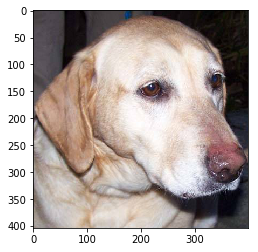

CAT


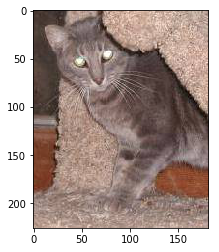

CAT


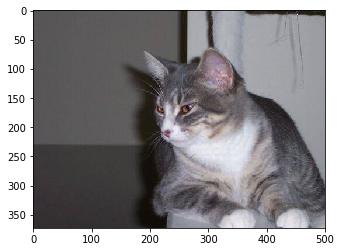

CAT


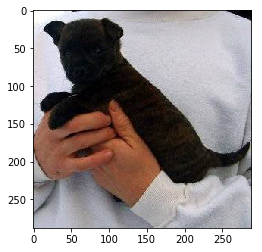

DOG


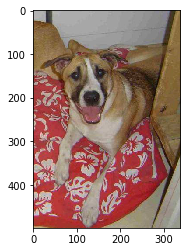

CAT


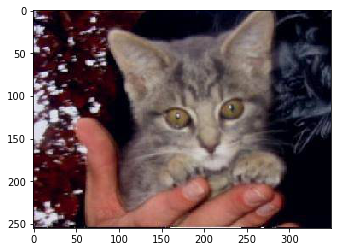

In [9]:
for n in range(10):
    this_image_id = test_set[n]
    prediction = outputs[n].item()
    image = mpimg.imread(this_image_id)
    
    if prediction >= 0.5:
        print('DOG')
        plt.imshow(image)
        plt.show()
    else:
        print('CAT')
        plt.imshow(image)
        plt.show()